In [33]:
import os
import json
import random
from src.Utils import plot_data, create_mask, plot_mask, compare_folders
from src.CustomDataset import CustomDataset
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
val_dir = "data/valid"
with open ("data/valid/_annotations.coco.json", "r") as f:
    annotations = json.load(f)
all_images = [os.path.join(val_dir, f) for f in os.listdir(val_dir) if f.endswith(".jpg")]


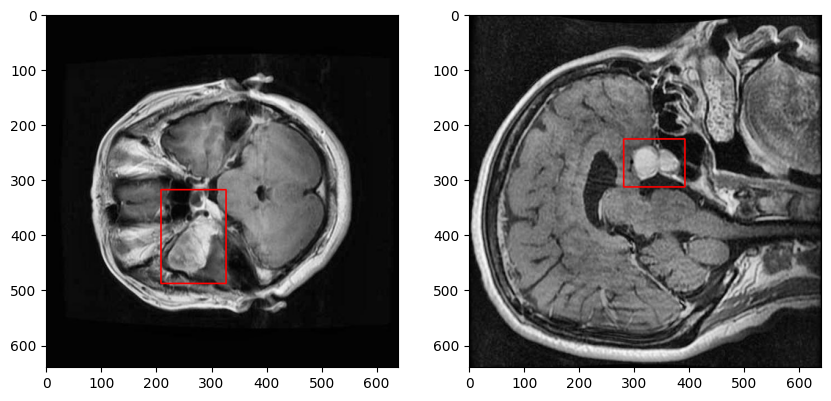

In [26]:
random_image_files = random.sample(all_images,2)
plot_data(random_image_files, annotations)


In [27]:
for part in (os.listdir("data")):
    original_image_dir = f"data/{part}"
    json_file = f"data/{part}/_annotations.coco.json"
    mask_dir = f"data1/{part}/masks"
    img_dir = f"data1/{part}/images"
    create_mask(json_file,mask_dir,img_dir,original_image_dir)

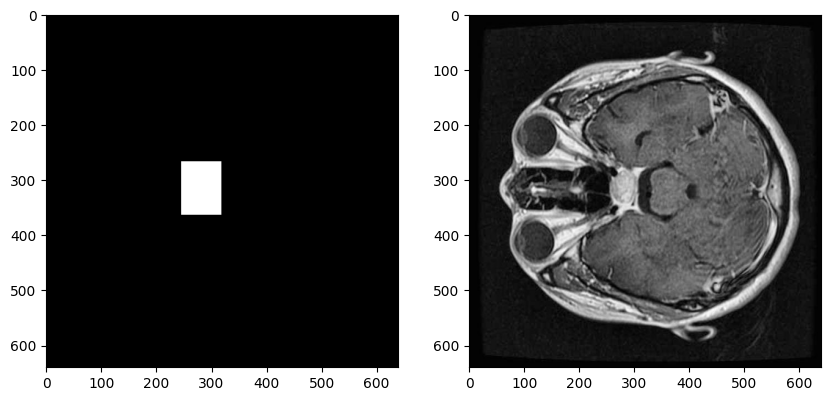

In [28]:
plot_mask("data1/valid/masks", "data1/valid/images")

In [31]:
compare_folders("data1/valid/masks", "data1/valid/images")
compare_folders("data1/test/masks", "data1/test/images")
compare_folders("data1/train/masks", "data1/train/images")

In [36]:
train_path = "data1/train"
test_path = "data1/test"
val_path = "data1/valid"

image_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229]),  
    transforms.Lambda(lambda x: x.clamp(0, 1))
])

train_dataset = CustomDataset(train_path, transform=image_transform)
valid_dataset = CustomDataset(val_path, transform=image_transform)
test_dataset = CustomDataset(test_path, transform=image_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [39]:
x, y = next(iter(train_loader))
x.shape , y.shape , type(x) , type(y)

(torch.Size([32, 1, 224, 224]),
 torch.Size([32, 1, 224, 224]),
 torch.Tensor,
 torch.Tensor)